In [8]:
import pandas as pd
df = pd.read_csv('Stores.csv')


In [6]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [5]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [6]:
df.shape

(896, 5)

In [7]:
df["Store_Sales"].idxmax()

649

In [8]:
df.iloc[648]

Store ID                  649
Store_Area               1514
Items_Available          1794
Daily_Customer_Count     1400
Store_Sales             54820
Name: 648, dtype: int64

In [9]:
df["Store_Sales"].idxmin()

31

In [10]:
df.iloc[30]

Store ID                   31
Store_Area               1439
Items_Available          1746
Daily_Customer_Count      990
Store_Sales             80140
Name: 30, dtype: int64

In [11]:
df = df.drop("Store ID ",axis = "columns")

In [12]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [16]:
df.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


In [17]:
df.corr()["Store_Sales"].sort_values()

Daily_Customer_Count    0.008629
Store_Area              0.097474
Items_Available         0.098849
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

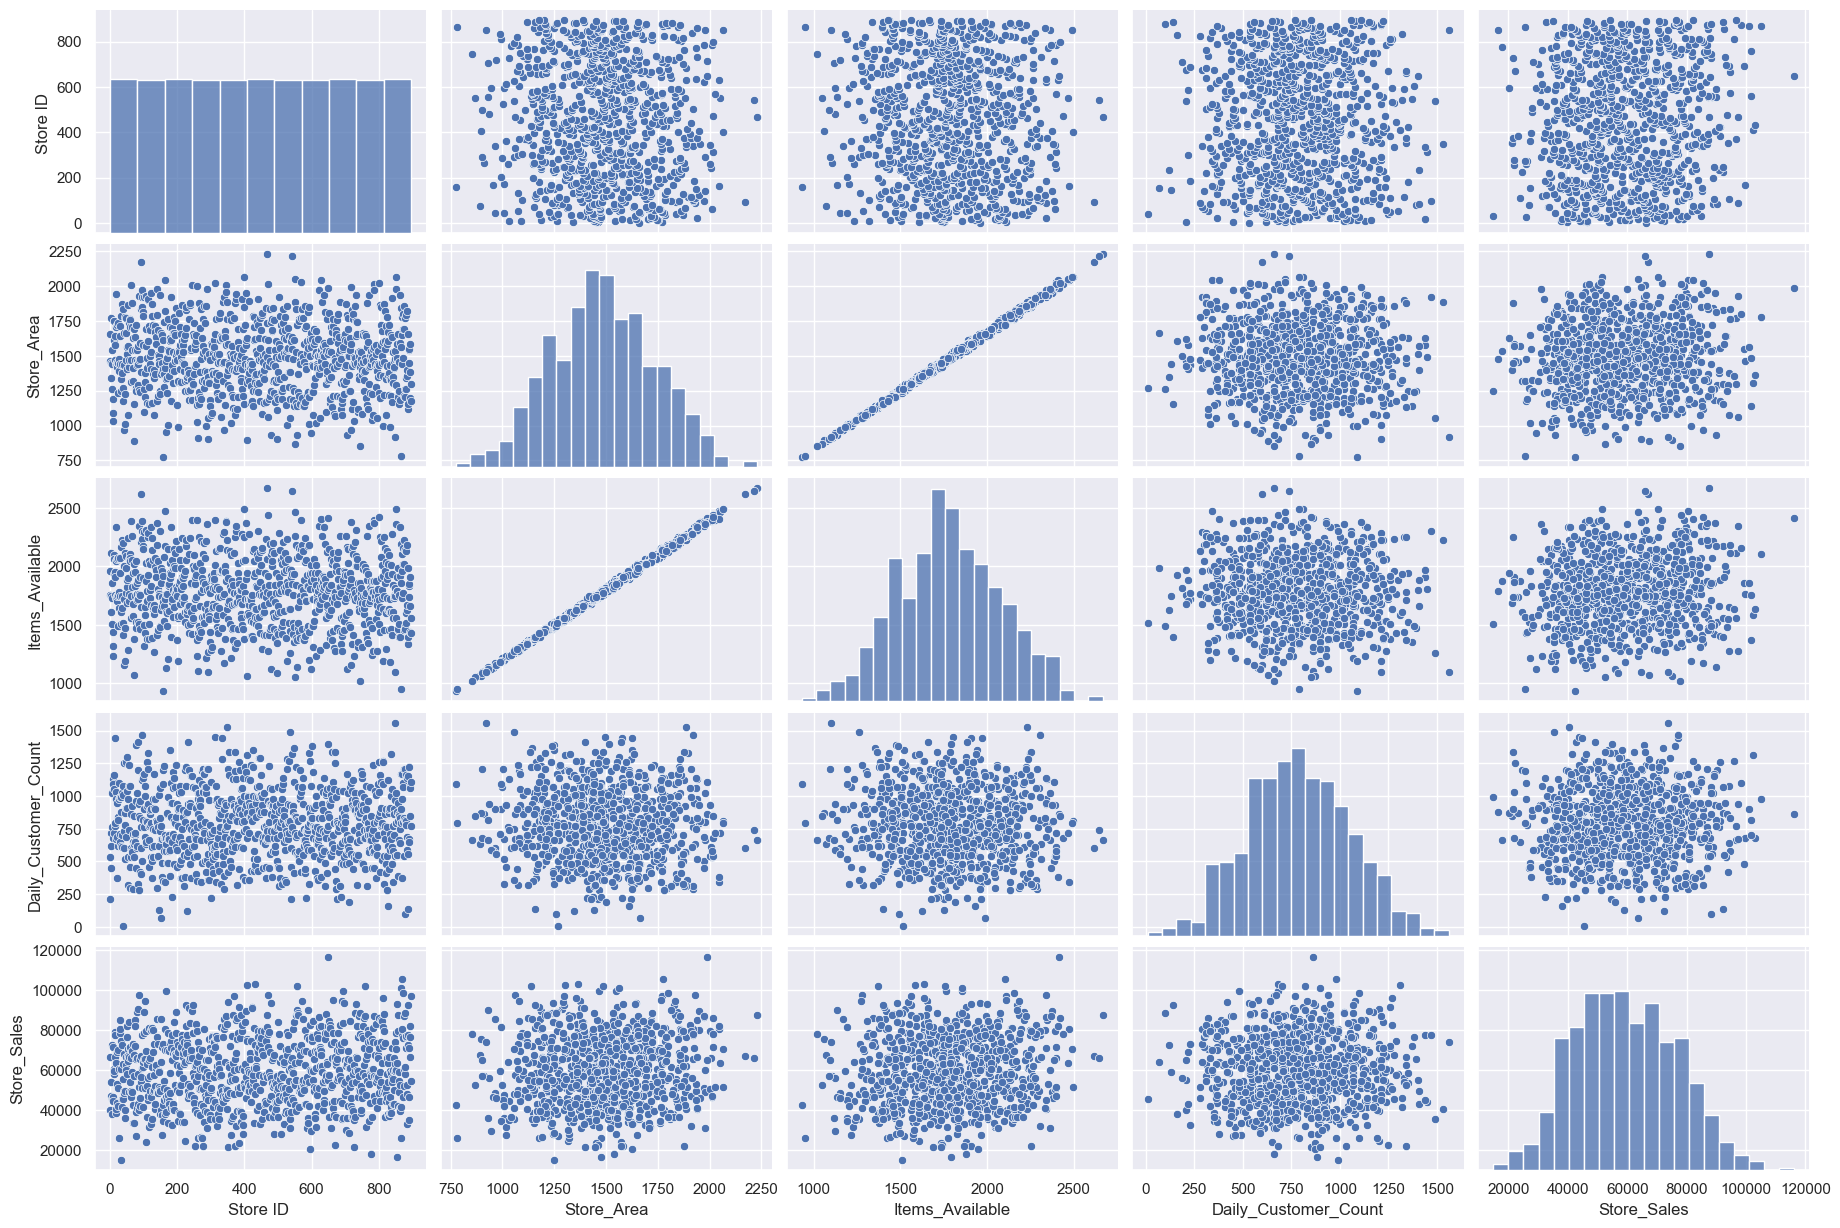

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt  
sns.pairplot(df,aspect=1.5)
plt.show()


<Figure size 4000x2000 with 0 Axes>

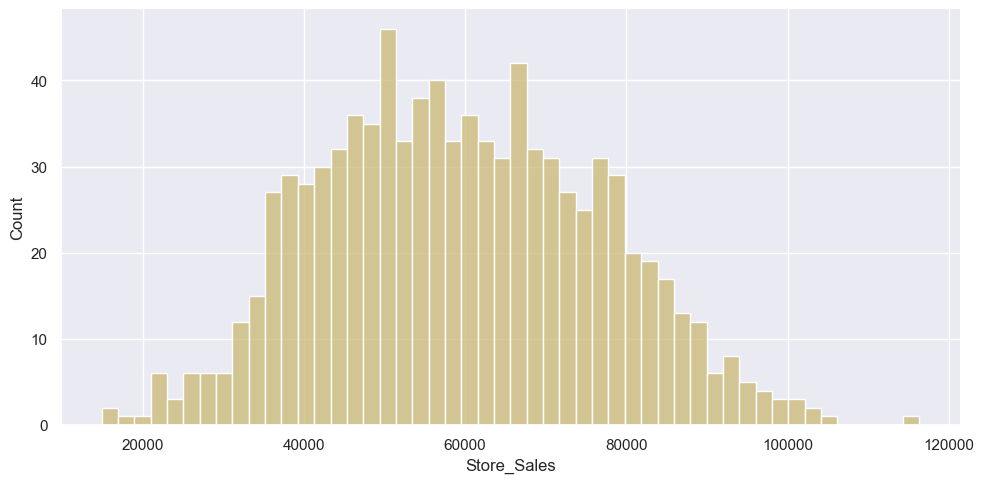

In [16]:
plt.figure(figsize=(20,10), dpi=200)
sns.displot(data=df,x="Store_Sales",bins = 50,color = "y",aspect=2)

In [17]:
# Feature Engineering

In [1]:
import numpy as np

In [18]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [5]:
IQRDailyCustomerCount = 970-600
upperlim = 970 + 1.5 * IQRDailyCustomerCount
lowerlim = 600 - 1.5 * IQRDailyCustomerCount
df.loc[df["Daily_Customer_Count"]>upperlim] = np.nan
df.loc[df["Daily_Customer_Count"]<lowerlim] = np.nan

In [9]:
df = df.dropna()

In [10]:
X = df[["Store_Area","Items_Available","Daily_Customer_Count"]]
y = df["Store_Sales"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size = 0.3)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)


In [ ]:
# FEATURING ENGINEERING.....

In [ ]:
# ML

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [17]:
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)
predictionslr = lr.predict(scaled_X_train)